<a href="https://colab.research.google.com/github/gluoneros/talentoTech/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección nueva

# **TALENTO TECH**
# **Proyecto Final**
## Grupo 2


<img src="https://cdn.simpleicons.org/python/000/fff" alt="Python" align=left width=24 height=24>

<img src="https://cdn.simpleicons.org/jupyter/000/fff" alt="jupyter" align=left width=24 height=24>
---

- Monica ...
- Juan Pablo ....
- Juan Pablo ....
- Hildebrando Vargas
- Jonathan Gutierrez
- Mary Luz Ceballos


## Tareas
1. Cargar los Datos
2. Explore y visualice los datos para obtener información.
4. Prepare los datos para los algoritmos de machine learning.
3. Generación de Estadísticas Descriptivas
4. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
5. Identificación y manejo de valores atípicos y tendencias en los datos
6. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
7. Eliminación de registros con datos faltantes o imputación de valores categóricos.
8. Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.
9. Cálculo y visualización de matrices de correlación.
10. Aplicación de PCA para reducir la dimensionalidad de datasets
11. Seleccione un modelo y entrénelo.
12. Ajusta tu modelo.
13. Presente su solución.
14. Inicie, supervise y mantenga su sistema.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
!pip install sodapy

In [14]:
from sodapy import Socrata

In [15]:
client = Socrata("www.datos.gov.co", None)

* Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [16]:
results1 = client.get("3ebi-d83g", limit=5000)

In [17]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [18]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [36]:
df1 = pd.DataFrame(
    {#'municipio': datos1['mpio'],
     #'departamento': datos1['dpto'],
     'anio': datos1['anio'],
     'potencia_m': datos1['potencia_maxima'],
     'prom_diaria': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [37]:
df1.shape

(4273, 5)

In [38]:
df1.isnull().sum()

anio                0
potencia_m          0
prom_diaria         0
energia_activa      0
energia_reactiva    0
dtype: int64

In [39]:
df1.dtypes

anio                object
potencia_m          object
prom_diaria         object
energia_activa      object
energia_reactiva    object
dtype: object

In [40]:
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['prom_diaria'] = pd.to_numeric(df1['prom_diaria'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
df1['anio'] = pd.to_numeric(df1['anio'], errors='coerce')
df1

,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva
0,2024,286.40,24.00,132215,41907.0
1,2024,102.60,10.16,28132,12662.0
2,2024,27.46,4.19,2686,1110.0
3,2024,2190.28,23.59,1331271,284638.0
4,2024,247.59,10.90,64368,30561.0
...,...,...,...,...,...
4268,2024,31.23,10.05,7610,3285.0
4269,2024,87.82,16.39,31775,7881.0
4270,2024,3236.71,23.56,1590470,387197.0
4271,2024,136.84,13.01,39226,10719.0


### Escaler

In [41]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [60]:
df_escalado1 = MinMaxScaler().fit_transform(df1)
df_escalado1

array([[1.00000000e+00, 8.39543434e-03, 4.72440945e-02, 6.41169384e-03,
        7.71027741e-03],
       [1.00000000e+00, 3.00758227e-03, 2.00000000e-02, 1.36424589e-03,
        2.32962351e-03],
       [1.00000000e+00, 8.04953306e-04, 8.24803150e-03, 1.30256095e-04,
        2.04223827e-04],
       ...,
       [1.00000000e+00, 9.48798403e-02, 4.63779528e-02, 7.71289694e-02,
        7.12386065e-02],
       [1.00000000e+00, 4.01128224e-03, 2.56102362e-02, 1.90224333e-03,
        1.97213982e-03],
       [1.00000000e+00, 1.46985764e-01, 4.72440945e-02, 1.21572873e-01,
        1.34857272e-01]])

<Axes: >

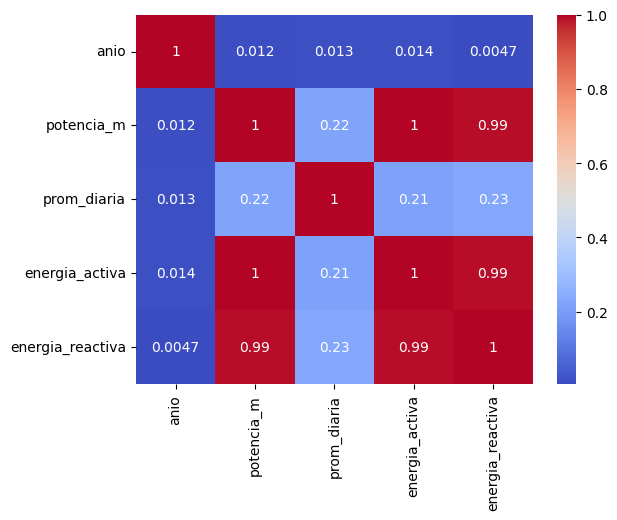

In [45]:
correlacion1 = df1[['anio',	'potencia_m',  'prom_diaria', 'energia_activa',	'energia_reactiva']].corr()

sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

* our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)




In [77]:
datos2 = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
datos2.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [78]:
datacolombia = datos2[datos2['country'] == 'Colombia']
datacolombia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
4506,Colombia,1900,COL,4034733.0,4.353822e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,Colombia,1901,COL,4112556.0,4.413478e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,Colombia,1902,COL,4194368.0,4.486636e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,Colombia,1903,COL,4280293.0,4.548537e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,Colombia,1904,COL,4367979.0,4.620044e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
datacolombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 4506 to 4629
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 126.9+ KB


In [80]:
df2 = pd.DataFrame(
    {'anio': datacolombia['year'],
     'cons_bio_per': datacolombia['biofuel_elec_per_capita'],
     'cons_carb_per': datacolombia['coal_elec_per_capita'],
     'cons_gas_per': datacolombia['gas_elec_per_capita'],
     'cons_conb_per': datacolombia['oil_elec_per_capita'],
     'cons_solar_per': datacolombia['solar_energy_per_capita'],
     'cons_wind_per': datacolombia['wind_energy_per_capita'],
     'cons_hydro_per': datacolombia['hydro_elec_per_capita'],
     'cons_nuclear_per': datacolombia['nuclear_elec_per_capita'],
     'cons_other_per': datacolombia['other_renewables_elec_per_capita'],
     'cons_total_per': datacolombia['electricity_demand_per_capita']
    }
)
df2

,anio,cons_bio_per,cons_carb_per,cons_gas_per,cons_conb_per,cons_solar_per,cons_wind_per,cons_hydro_per,cons_nuclear_per,cons_other_per,cons_total_per
4506,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4625,2019,31.283,161.993,262.217,54.795,6.936,3.326,1055.643,0.0,31.283,1575.893
4626,2020,42.214,183.976,298.249,52.032,9.839,0.522,951.097,0.0,42.214,1552.110
4627,2021,43.481,87.351,267.099,54.934,16.407,3.071,1178.262,0.0,43.481,1641.026
4628,2022,42.025,84.821,323.090,53.013,25.260,3.763,1132.166,0.0,42.025,1650.922


In [81]:
df2.shape

(124, 11)

In [82]:
df2.dtypes

anio                  int64
cons_bio_per        float64
cons_carb_per       float64
cons_gas_per        float64
cons_conb_per       float64
cons_solar_per      float64
cons_wind_per       float64
cons_hydro_per      float64
cons_nuclear_per    float64
cons_other_per      float64
cons_total_per      float64
dtype: object

In [84]:
df2.isnull().sum()

anio                  0
cons_bio_per        100
cons_carb_per       100
cons_gas_per        100
cons_conb_per       100
cons_solar_per       90
cons_wind_per        90
cons_hydro_per       65
cons_nuclear_per     65
cons_other_per       74
cons_total_per      100
dtype: int64

In [85]:
df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
df2['cons_carb_per'].fillna(df2['cons_carb_per'].mean(), inplace=True)
df2['cons_gas_per'].fillna(df2['cons_gas_per'].mean(), inplace=True)
df2['cons_conb_per'].fillna(df2['cons_conb_per'].mean(), inplace=True)
df2['cons_hydro_per'].fillna(df2['cons_hydro_per'].mean(), inplace=True)
df2['cons_solar_per'].fillna(df2['cons_solar_per'].mean(), inplace=True)
df2['cons_wind_per'].fillna(df2['cons_wind_per'].mean(), inplace=True)
df2['cons_nuclear_per'].fillna(df2['cons_nuclear_per'].mean(), inplace=True)
df2['cons_other_per'].fillna(df2['cons_other_per'].mean(), inplace=True)
df2['cons_total_per'].fillna(df2['cons_total_per'].mean(), inplace=True)

/tmp/ipykernel_30045/3639978983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
/tmp/ipykernel_30045/3639978983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [86]:
df2.isnull().sum()

anio                0
cons_bio_per        0
cons_carb_per       0
cons_gas_per        0
cons_conb_per       0
cons_solar_per      0
cons_wind_per       0
cons_hydro_per      0
cons_nuclear_per    0
cons_other_per      0
cons_total_per      0
dtype: int64

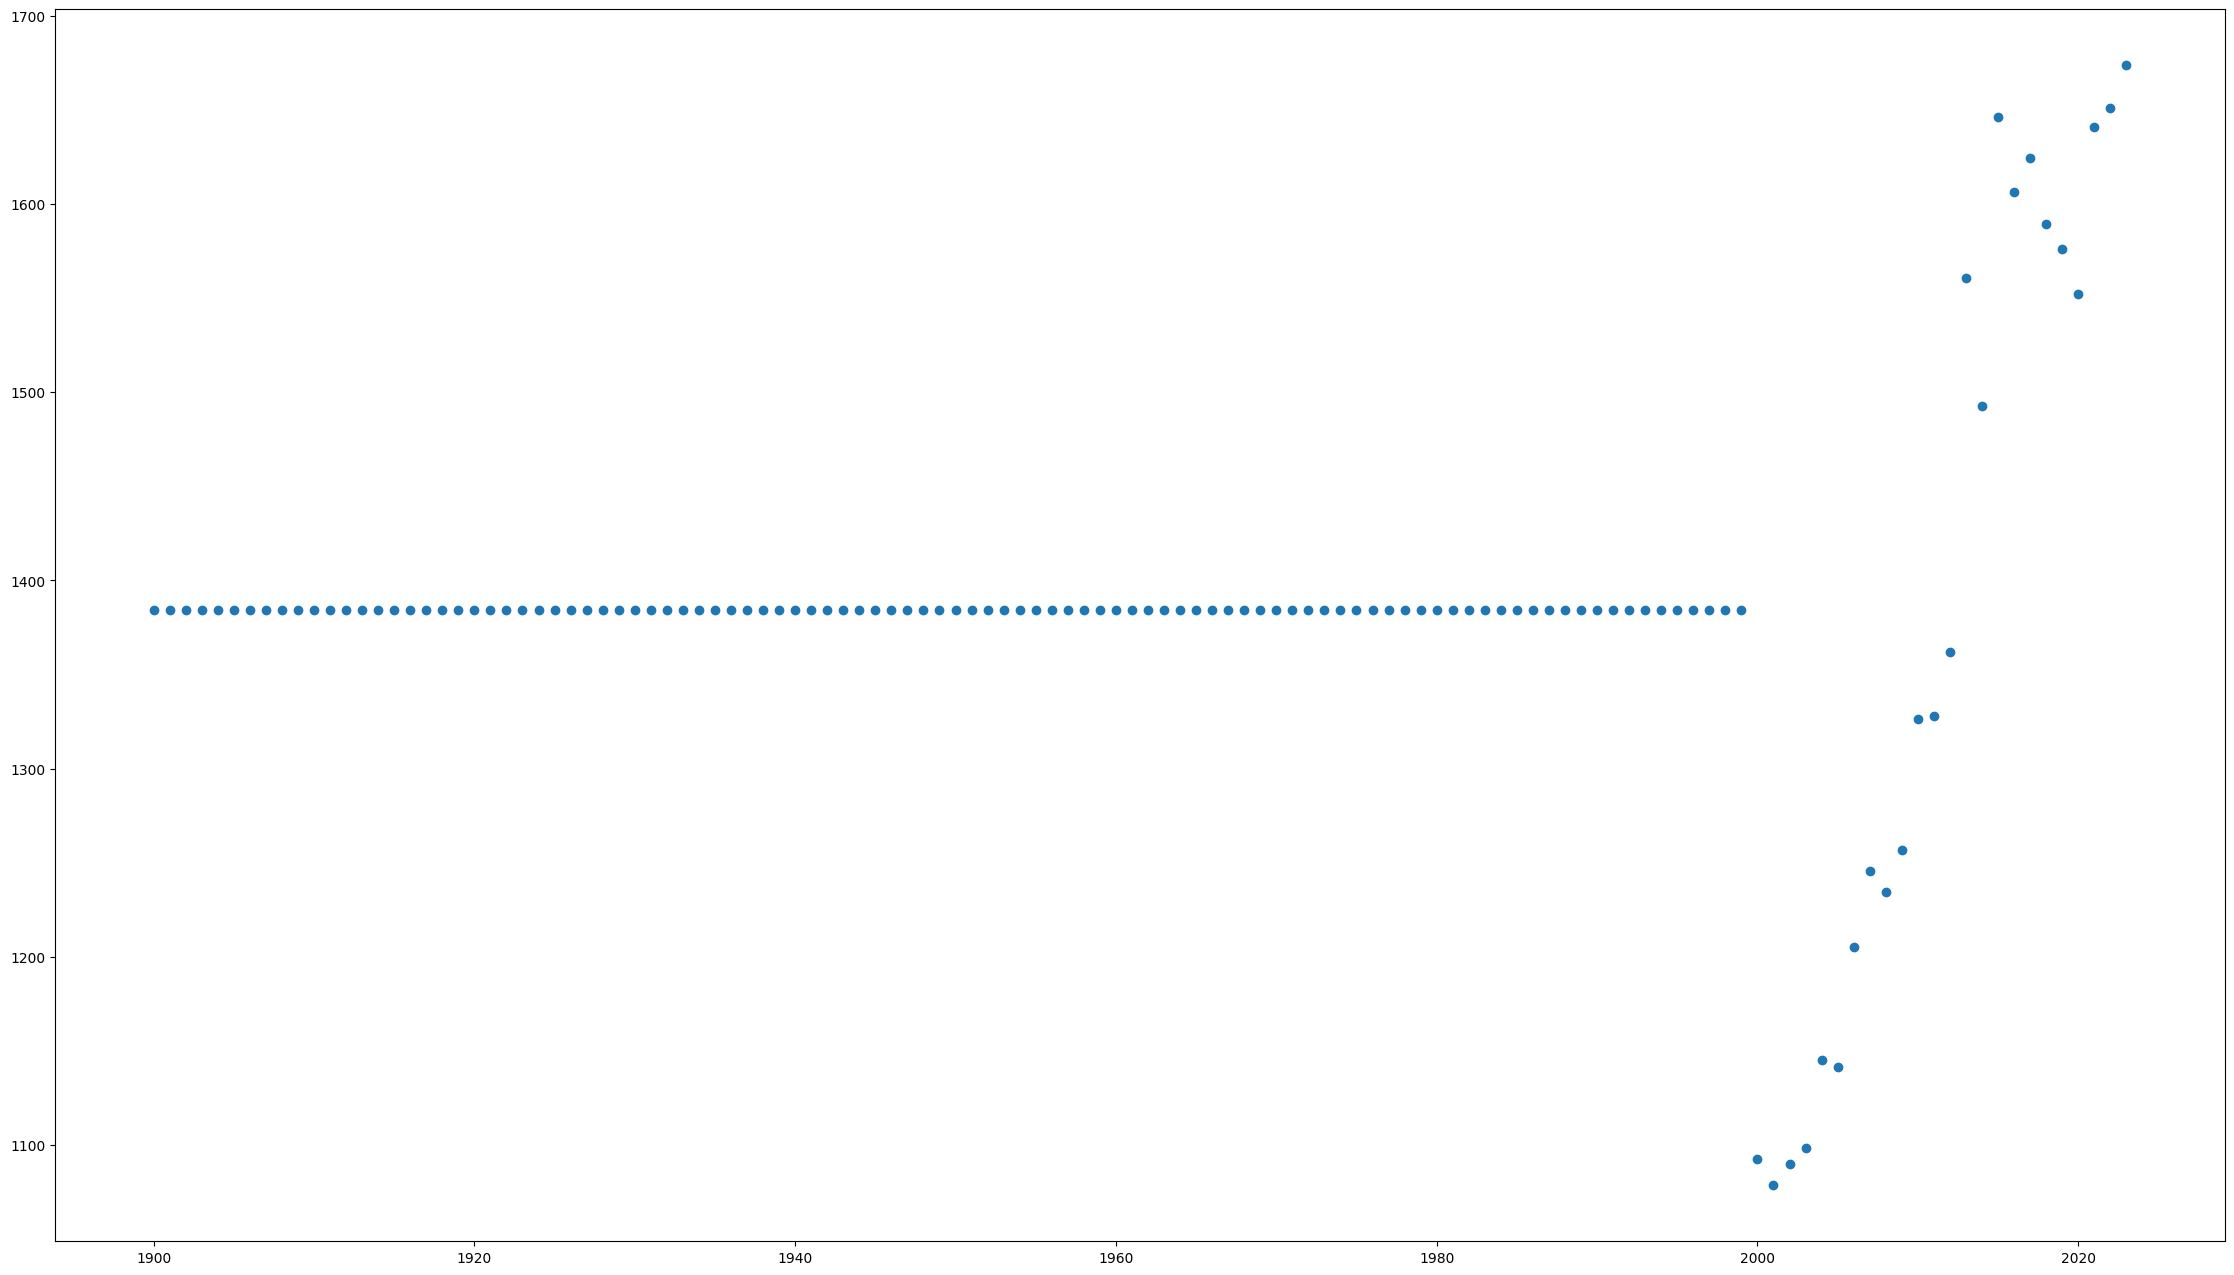

In [88]:
plt.figure(figsize=(28, 16))
plt.scatter(x='anio', y='cons_total_per', data=df2)

In [89]:
df_escalado2 = MinMaxScaler().fit_transform(df2)
df_escalado2

df2['cons_nuclear_per']

4506    0.0
4507    0.0
4508    0.0
4509    0.0
4510    0.0
       ... 
4625    0.0
4626    0.0
4627    0.0
4628    0.0
4629    0.0
Name: cons_nuclear_per, Length: 124, dtype: float64

* Meta FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

<Axes: >

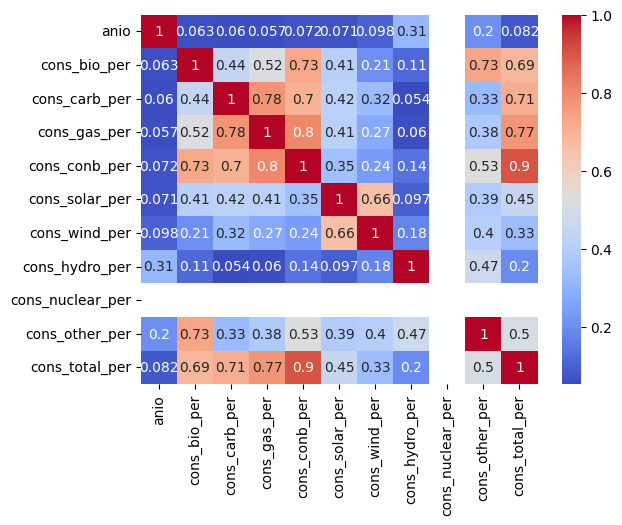

In [90]:
correlacion2 = df2[['anio', 'cons_bio_per',	'cons_carb_per', 'cons_gas_per', 'cons_conb_per', 'cons_solar_per',	'cons_wind_per', 'cons_hydro_per', 'cons_nuclear_per',	'cons_other_per', 'cons_total_per']].corr()

sns.heatmap(correlacion2, annot=True, cmap='coolwarm')

In [ ]:
results3 = client.get("vy9n-w6hc", limit=3000)

datos3 = pd.DataFrame.from_records(results3)
datos3.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [ ]:
datos3['tipo'].describe()

,tipo
count,158
unique,2
top,Solar
freq,145


In [ ]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


# 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
# 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

In [ ]:
df3 = pd.DataFrame(
    {'Municipio': datos3['municipio'],
     'Departamento': datos3['departamento'],
     'Tipo': datos3['tipo'],
     'Usuarios': datos3['usuarios'],
     'Capacidad_instalada': datos3['energia_kwh_d_a'],
     'Energía_p': datos3['energia_kwh_d_a'],
     'Energía_no_renovable': datos3['emisiones_co2_ton_a_o']

    }
)


In [ ]:
df3.shape

(158, 7)

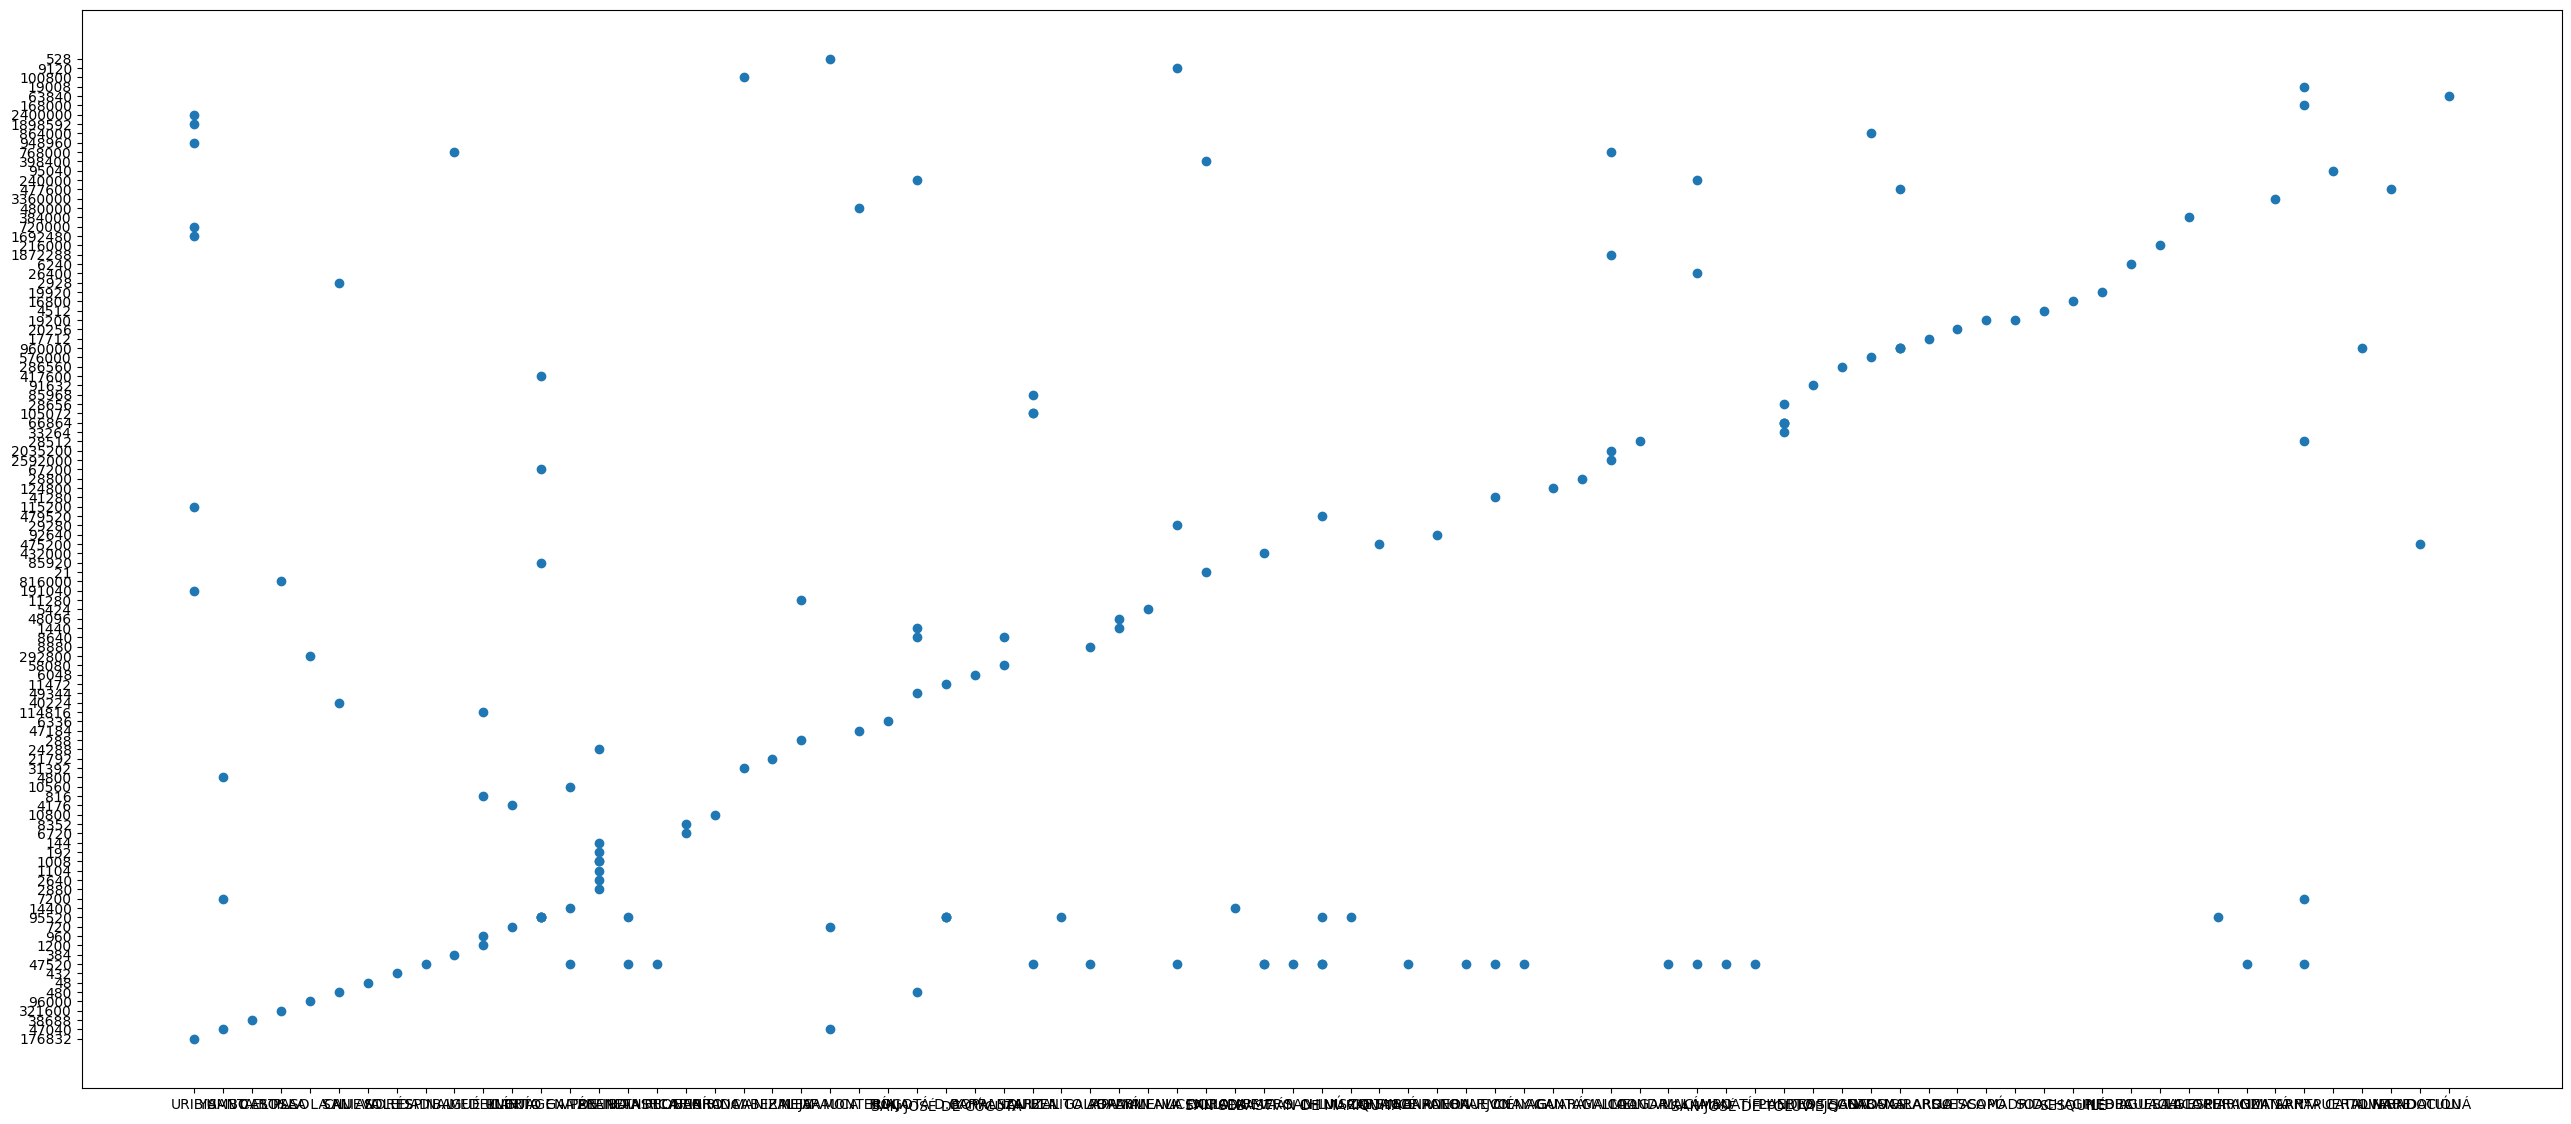

In [ ]:
plt.figure(figsize=(32, 14))
plt.scatter(x='Municipio', y='Capacidad_instalada', data=df3)
#plt.xticks(rotation=65)

In [ ]:
df_final = pd.DataFrame(
    {'potencia_m': datos1['potencia_maxima'],
     'prom_diaria': datos1['prom_diario_horas']
    }
)

In [ ]:
df_final.isnull().sum()

,0
potencia_m,0
prom_diaria,0


In [ ]:
df_final.shape

(4203, 2)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4203 entries, 0 to 4202
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   potencia_m   4203 non-null   object
 1   prom_diaria  4203 non-null   object
dtypes: object(2)
memory usage: 65.8+ KB


In [ ]:
df_final['potencia_m'] = pd.to_numeric(df_final['potencia_m'])


In [ ]:
df_final['prom_diaria'] = pd.to_numeric(df_final['prom_diaria'])


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4203 entries, 0 to 4202
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   potencia_m   4203 non-null   float64
 1   prom_diaria  4203 non-null   float64
dtypes: float64(2)
memory usage: 65.8 KB


In [ ]:
df_final.isnull().sum()

,0
potencia_m,0
prom_diaria,0


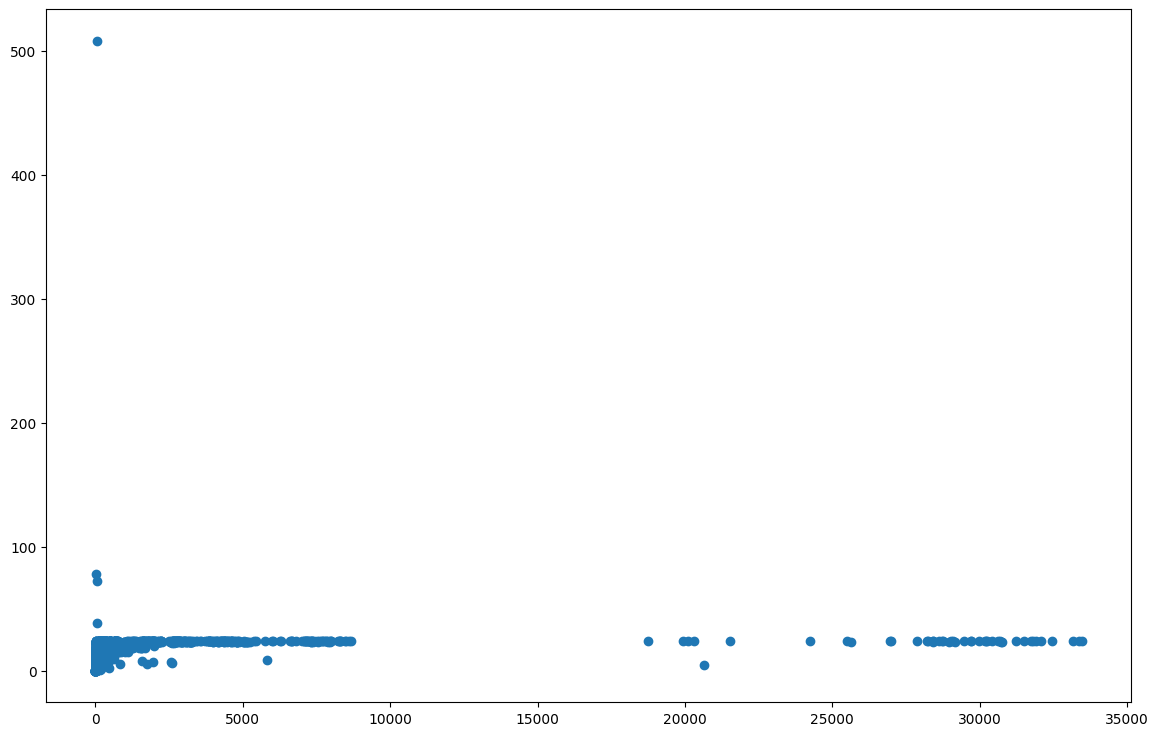

In [ ]:
plt.figure(figsize=(14, 9))
plt.scatter(x='potencia_m', y='prom_diaria', data=df_final)

(array([4.025e+03, 8.800e+01, 4.400e+01, 0.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 1.900e+01, 1.800e+01]),
 array([    0.   ,  3346.236,  6692.472, 10038.708, 13384.944, 16731.18 ,
        20077.416, 23423.652, 26769.888, 30116.124, 33462.36 ]),
 <BarContainer object of 10 artists>)

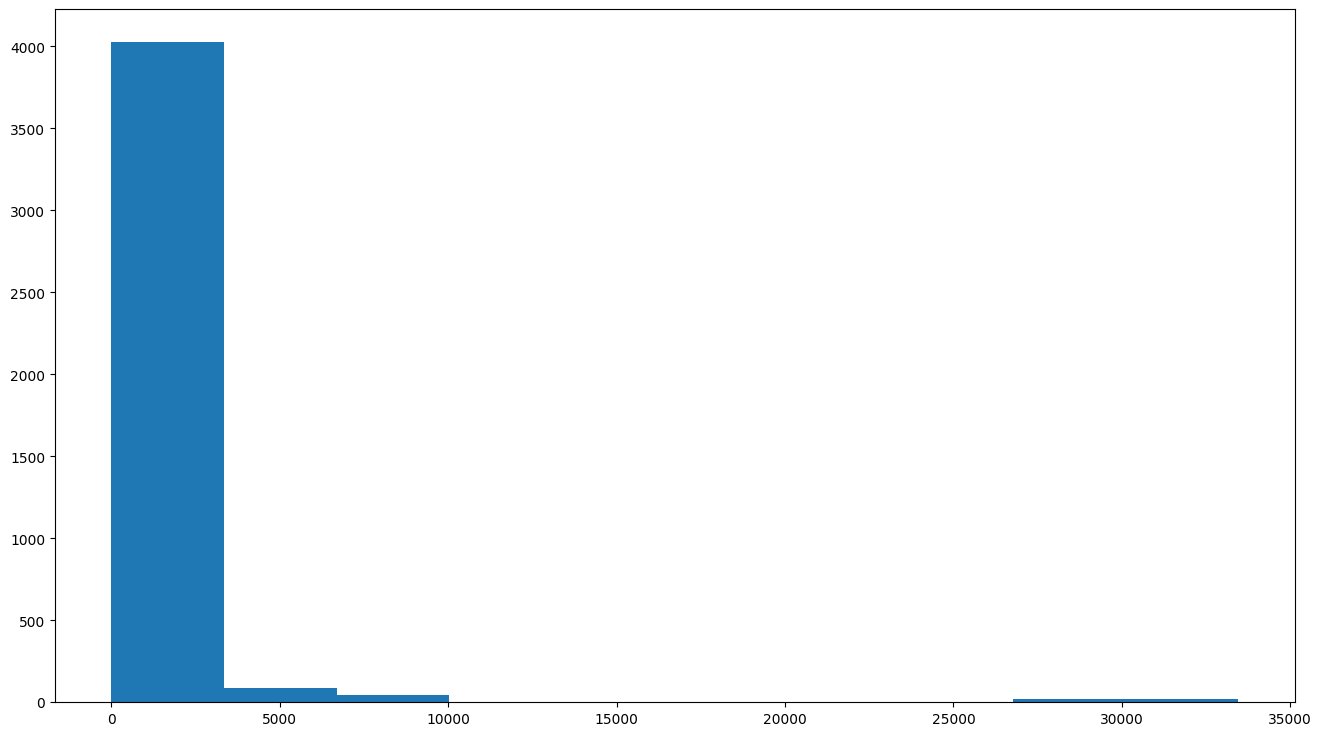

In [ ]:
plt.figure(figsize=(16, 9))
plt.hist(x='potencia_m', data=df_final)

(array([4.2e+03, 2.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00]),
 array([  0. ,  50.8, 101.6, 152.4, 203.2, 254. , 304.8, 355.6, 406.4,
        457.2, 508. ]),
 <BarContainer object of 10 artists>)

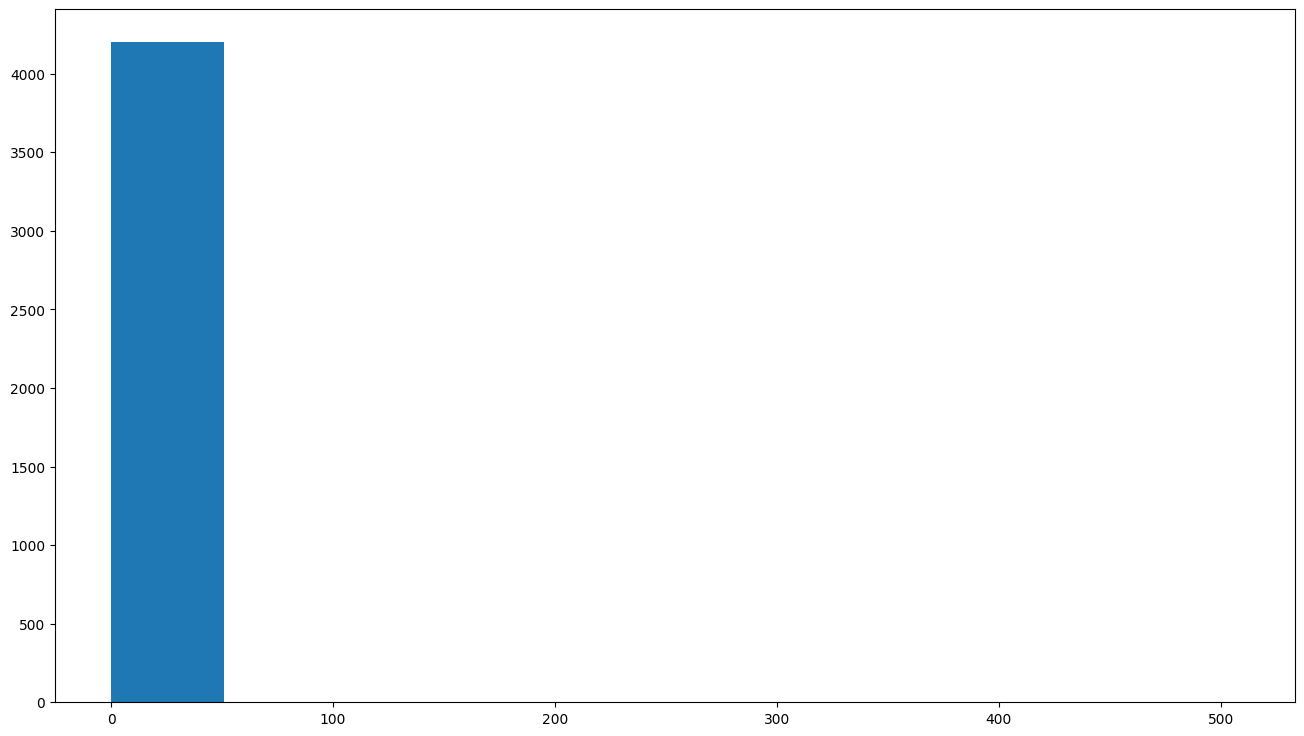

In [ ]:
plt.figure(figsize=(16, 9))
plt.hist(x='prom_diaria', data=df_final)

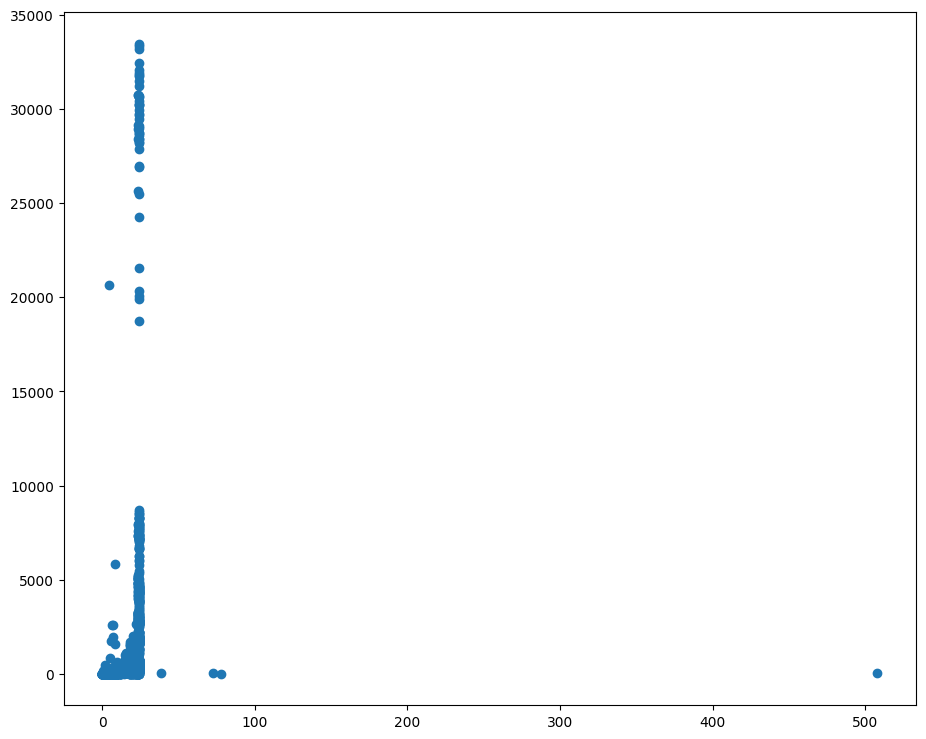

In [ ]:
plt.figure(figsize=(11, 9))
plt.scatter(x='prom_diaria', y='potencia_m', data=df_final)

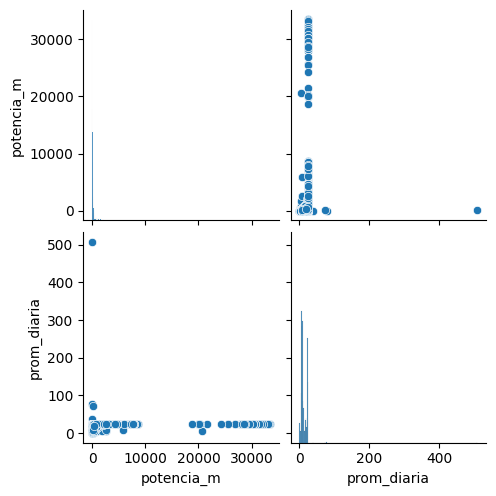

In [ ]:
sns.pairplot(df_final)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='potencia_m'>

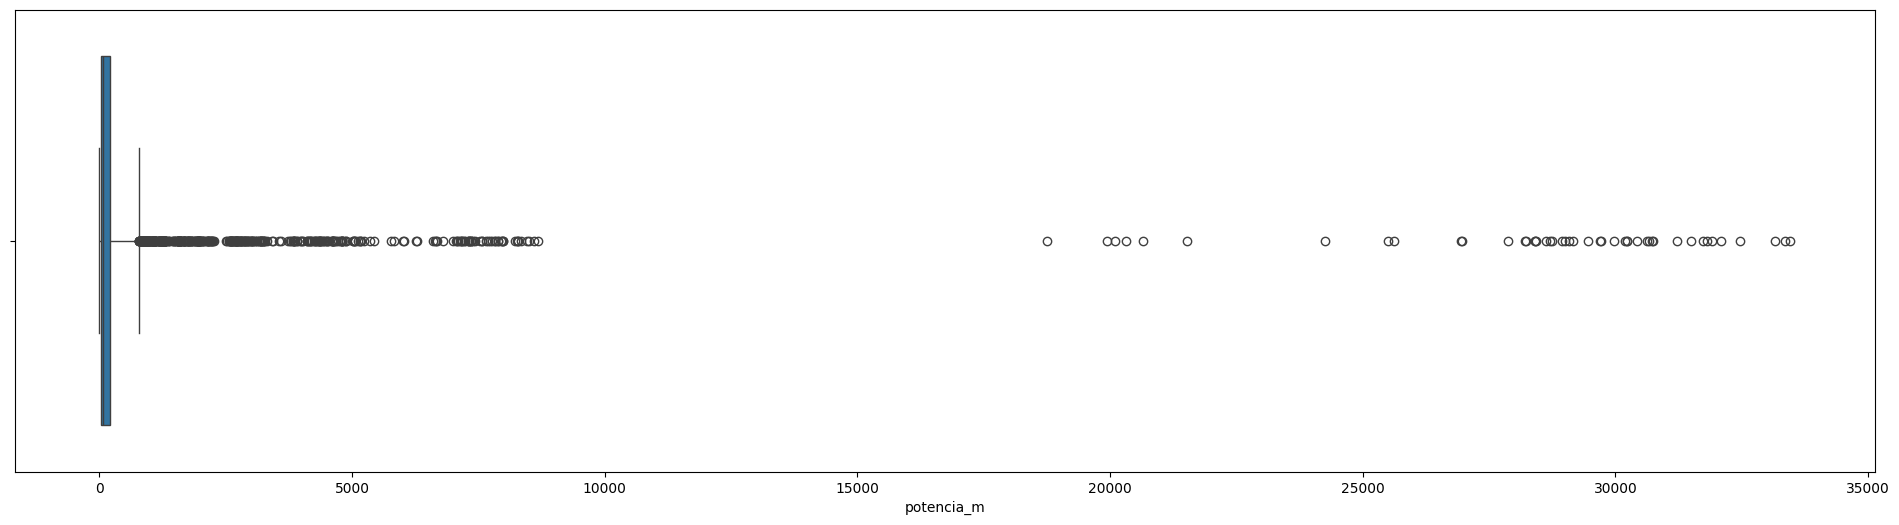

In [ ]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_final['potencia_m'], whis=3)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='prom_diaria'>

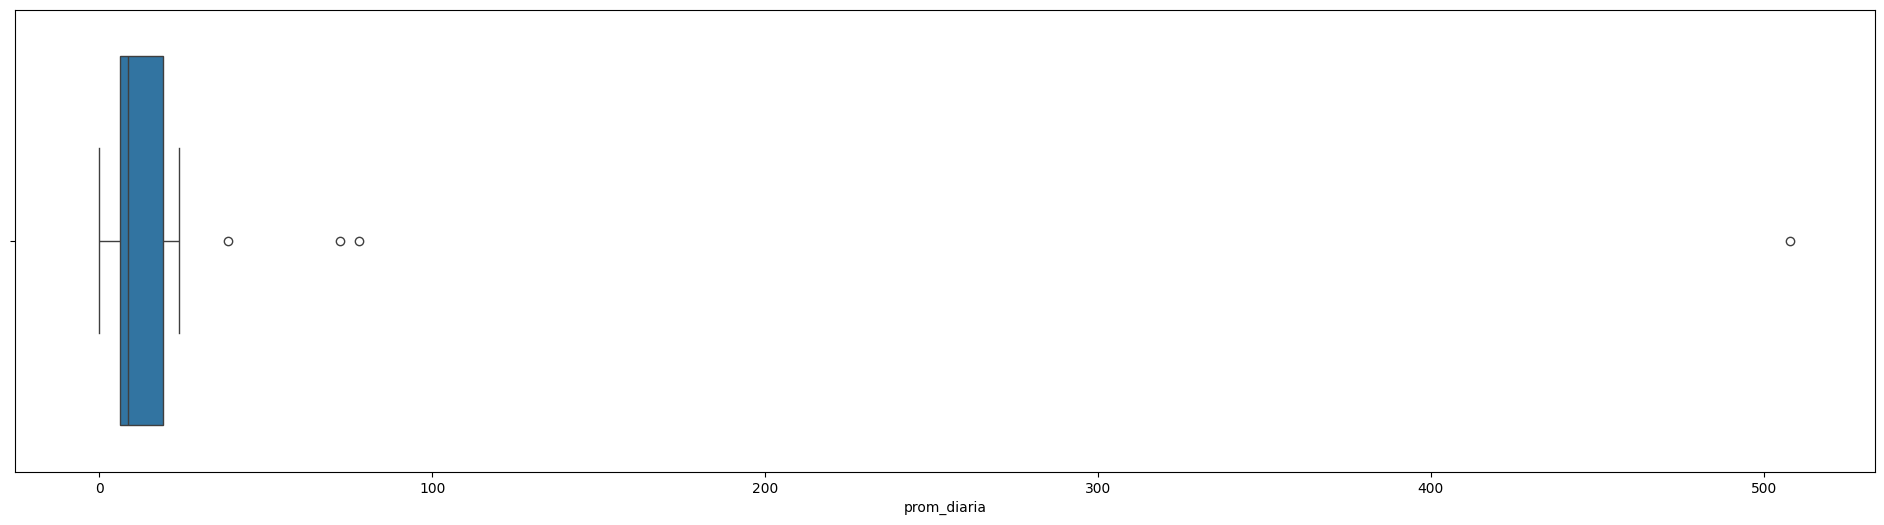

In [ ]:
plt.figure(figsize=(24, 6))
sns.boxplot(x=df_final['prom_diaria'])